In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_marketing = pd.read_csv('bank_marketing_Data.csv')

In [3]:
df_1 = bank_marketing.copy()
df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
print('No. of Columns', df_1.shape[1])
print('No. of Rows', df_1.shape[0])

No. of Columns 7
No. of Rows 210


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df_1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
df_1.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
check_null = df_1.isnull().sum().any()
if check_null == True:
    print('Dataset has Null values')
else:
    print('There are no Null values in the dataset')

There are no Null values in the dataset


Univarite Analysis

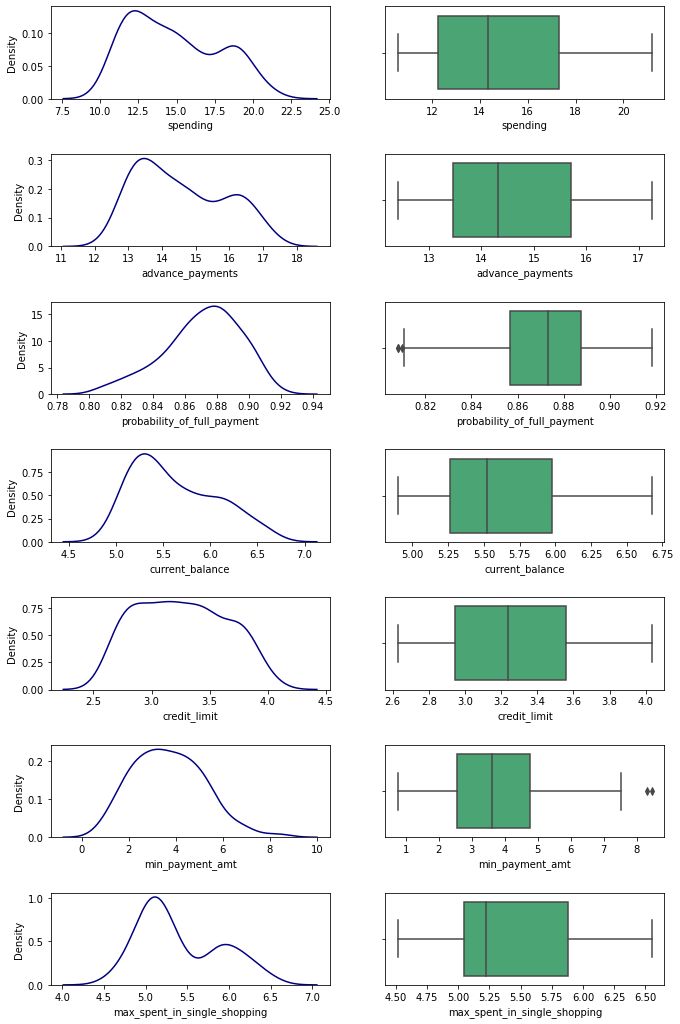

In [9]:
fig, axes = plt.subplots(nrows=len(df_1.columns), ncols=2, figsize=(11,18))

for i in range(0, len(df_1.columns)):
    sns.kdeplot(df_1[df_1.columns[i]], label=df_1.columns[i], ax=axes[i][0], color='navy')
    sns.boxplot(df_1[df_1.columns[i]], ax=axes[i][1], color='mediumseagreen')
    
plt.subplots_adjust(hspace=0.6)

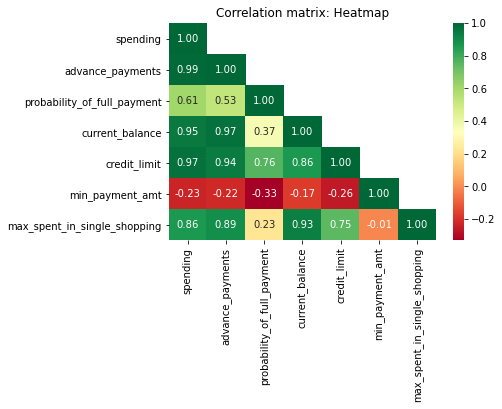

In [10]:
sns.heatmap(df_1.corr(), cmap='RdYlGn', fmt='.2f', annot=True, mask=np.triu(df_1.corr(),+1))
plt.title('Correlation matrix: Heatmap');

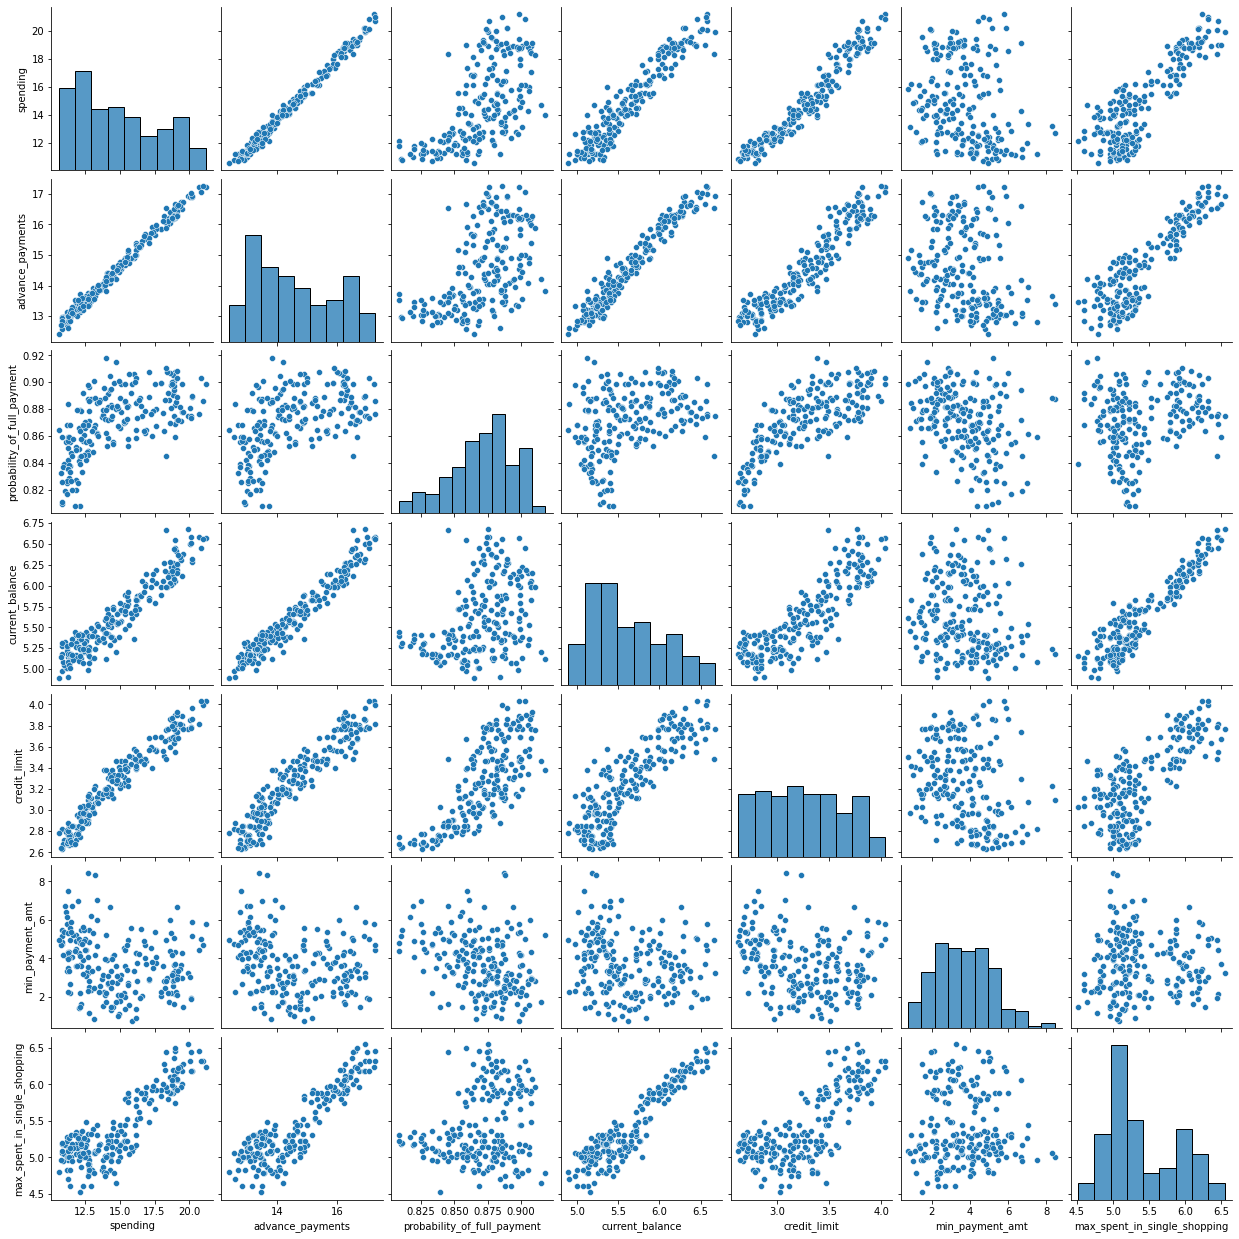

In [11]:
sns.pairplot(df_1);

In [12]:
# from scipy.stats import zscore

# df_1_scaled = df_1.apply(zscore)

In [13]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler()

df_1_scaled = X.fit_transform(df_1)

In [14]:
df_1_scaled

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

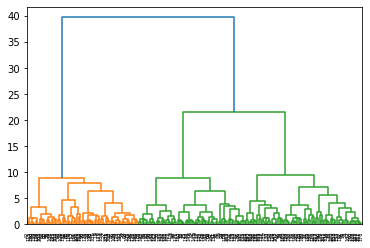

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

df_1_ward = linkage(df_1_scaled, method='ward')
df_1_dend = dendrogram(df_1_ward)

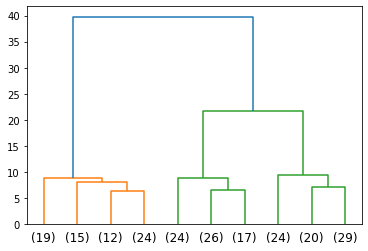

In [16]:
df_1_dend = dendrogram(df_1_ward, truncate_mode='lastp', p=10)

In [17]:
from scipy.cluster.hierarchy import fcluster

df_1_cluster = fcluster(df_1_ward, 2, criterion='maxclust')
df_1_cluster

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [18]:
from sklearn.cluster import KMeans

wss = []

for i in range(1,7):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(df_1_scaled)
    wss.append(KM.inertia_)
    print('Within Sum of Squares for', i, 'clusters, is', np.round(KM.inertia_, 3))

Within Sum of Squares for 1 clusters, is 1470.0
Within Sum of Squares for 2 clusters, is 659.172
Within Sum of Squares for 3 clusters, is 430.659
Within Sum of Squares for 4 clusters, is 371.302
Within Sum of Squares for 5 clusters, is 327.961
Within Sum of Squares for 6 clusters, is 290.59


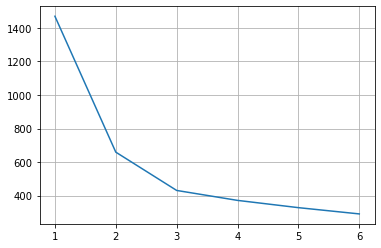

In [19]:
plt.plot(range(1,7), wss);
plt.grid(True);

In [20]:
KM = KMeans(n_clusters=2, random_state=1)
KM.fit(df_1_scaled)
labels = KM.labels_
KM.inertia_

659.1717544870411

In [21]:
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [22]:
# KM = KMeans(n_clusters=3, random_state=1)
# KM.fit(df_1_scaled)
# labels = KM.labels_
# KM.inertia_

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score

ass = []

cluster_nums = [2, 3, 4, 5, 6]

for n_clusters in cluster_nums:
    cluster = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = cluster.fit_predict(df_1_scaled)
    
    silhoutte_avg = silhouette_score(df_1_scaled, cluster_labels)
    ass.append(silhoutte_avg)
    print('Average siloutte score for', n_clusters, 'clusters, is', np.round(silhoutte_avg, 3))

Average siloutte score for 2 clusters, is 0.466
Average siloutte score for 3 clusters, is 0.401
Average siloutte score for 4 clusters, is 0.328
Average siloutte score for 5 clusters, is 0.278
Average siloutte score for 6 clusters, is 0.284


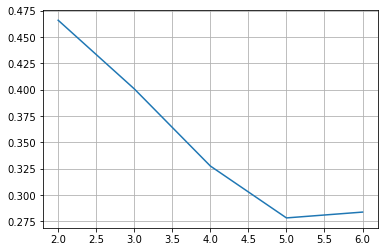

In [25]:
plt.plot(range(2,7), ass);
plt.grid(True);

In [26]:
print(silhouette_score(df_1_scaled, labels, random_state=1))
print(silhouette_samples(df_1_scaled, labels).min())

0.46577247686580914
-0.0061712389274612344


In [27]:
df_1['hierarchical'] = df_1_cluster
df_1['k_means'] = labels

In [28]:
df_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hierarchical,k_means
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [29]:
hierarchical_profile = df_1.groupby('hierarchical').mean()
hierarchical_profile = hierarchical_profile.drop(columns='k_means')
np.round(hierarchical_profile.T)

hierarchical,1,2
spending,18.0,13.0
advance_payments,16.0,14.0
probability_of_full_payment,1.0,1.0
current_balance,6.0,5.0
credit_limit,4.0,3.0
min_payment_amt,4.0,4.0
max_spent_in_single_shopping,6.0,5.0


In [30]:
k_means_profile = df_1.groupby('k_means').mean()
k_means_profile = k_means_profile.drop(columns='hierarchical')
np.round(k_means_profile.T[[1,0]])

k_means,1,0
spending,18.0,13.0
advance_payments,16.0,14.0
probability_of_full_payment,1.0,1.0
current_balance,6.0,5.0
credit_limit,4.0,3.0
min_payment_amt,3.0,4.0
max_spent_in_single_shopping,6.0,5.0


In [31]:
hierarchical_profile.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')